In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
heart=pd.read_csv("heart.csv")
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
labelencoder=preprocessing.LabelEncoder()
heart["Sex"]=labelencoder.fit_transform(heart["Sex"]) 
heart["ChestPainType"]=labelencoder.fit_transform(heart["ChestPainType"])
heart["RestingECG"]=labelencoder.fit_transform(heart["RestingECG"])
heart["ExerciseAngina"]=labelencoder.fit_transform(heart["ExerciseAngina"])
heart["ST_Slope"]=labelencoder.fit_transform(heart["ST_Slope"])
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [14]:
import statsmodels.api as sm
logit=sm.Logit(y,x)

In [15]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.362984
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      907
Method:                           MLE   Df Model:                           10
Date:                Mon, 03 Jan 2022   Pseudo R-squ.:                  0.4720
Time:                        16:05:32   Log-Likelihood:                -333.22
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                1.470e-121
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.0273      0.010      2.753      0.006       0.008       0.047
Sex                1.4336      0.253      5.673      0.000       0.938       1.929
ChestPainType     -0.6925      0.106     -6.525      0.000      -0.901      -0.485
RestingBP          0.0077      0.005      1.537      0.124      -0.002       0.018
Cholesterol       -0.0036      0.001     -3.472      0.001      -0.006      -0.002
FastingBS          1.0875      0.257      4.229      0.000       0.584       1.592
RestingECG        -0.1288      0.161     -0.799      0.424      -0.445       0.187
MaxHR             -0.0039      0.004     -1.086      0.278      -0.011       0.003
ExerciseAngina     1.1403      0.229      4.985      0.000       0.692       1.589
Oldpeak            0.3684      0.115      3.209      0.001       0.143       0.594
ST_Slope          -1.6891      0.206     -8.182      0.000      -2.094      -1.284
==================================================================================
"""

In [16]:
x=heart.iloc[:,[0,1,2,4,5,8,9,10]]
y=heart.iloc[:,11]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
x_train

,Age,Sex,ChestPainType,Cholesterol,FastingBS,ExerciseAngina,Oldpeak,ST_Slope
349,36,1,0,0,1,1,1.0,1
892,39,0,2,220,0,0,0.0,1
568,38,1,0,289,0,1,1.5,0
407,62,1,0,0,1,1,-0.5,1
612,55,1,0,223,1,0,0.0,1
...,...,...,...,...,...,...,...,...
140,52,1,0,331,0,1,2.5,1
500,65,1,0,248,0,1,4.0,0
813,69,0,3,239,0,0,1.8,2
421,66,1,2,0,0,0,-0.5,2


In [25]:
y_test

771    1
132    1
609    1
273    0
373    1
      ..
780    0
658    0
143    0
103    1
808    1
Name: HeartDisease, Length: 184, dtype: int64

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

D:\jup\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
classifier.coef_

array([[ 0.03022976,  1.03063622, -0.68055405, -0.00397291,  1.08766256,
         1.22180454,  0.30564275, -1.6962508 ]])

In [20]:
classifier.predict_proba(x_train)

array([[0.02506669, 0.97493331],
       [0.89372578, 0.10627422],
       [0.03440552, 0.96559448],
       ...,
       [0.95789681, 0.04210319],
       [0.7786072 , 0.2213928 ],
       [0.66577788, 0.33422212]])

In [21]:
y_pred1=classifier.predict(x_train)
y_pred1

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,

In [22]:
y_pred2=classifier.predict(x_test)
y_pred2

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_train,y_pred1)
print (confusion_matrix1) 

confusion_matrix2 = confusion_matrix(y_test,y_pred2)
print (confusion_matrix2) 


[[269  57]
 [ 45 363]]
[[68 16]
 [14 86]]


In [70]:
train_accuracy = sum(y_train==y_pred1)/734
print("train_accuracy=",train_accuracy)

test_accuracy = sum(y_test==y_pred2)/184
print("test_accuracy=",test_accuracy)

train_accuracy= 0.8610354223433242
test_accuracy= 0.8369565217391305


In [30]:
print (classification_report (y_train, y_pred1))  
print (classification_report (y_test, y_pred2))  

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       326
           1       0.86      0.89      0.88       408

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        84
           1       0.84      0.86      0.85       100

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(y_train,classifier.predict(x_train))
print(Logit_roc_score ) 

Logit_roc_score=roc_auc_score(y_test,classifier.predict(x_test))
print(Logit_roc_score)  

0.857429628293035
0.8347619047619047


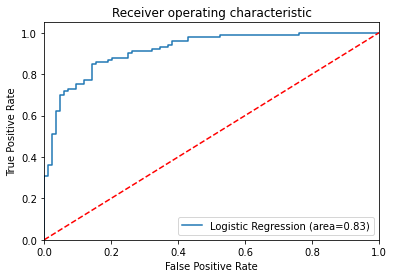

In [60]:
fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(x_test)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

# Decision Tree

In [61]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=2)

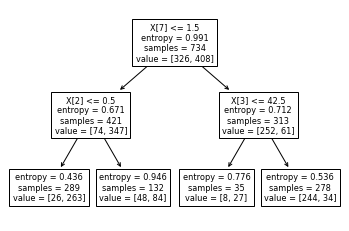

In [62]:
tree.plot_tree(model);

In [63]:
preds1 = model.predict(x_train) 
pd.Series(preds1).value_counts()  

1    456
0    278
dtype: int64

In [64]:
train_accuracy = sum(y_train==preds1)/734
train_accuracy 

0.8419618528610354

In [65]:
preds2= model.predict(x_test) 
pd.Series(preds2).value_counts()  

1    113
0     71
dtype: int64

In [66]:
test_accuracy = sum(y_test==preds2)/184
test_accuracy 

0.8097826086956522

# Support Vector Machines

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score

In [68]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[33,50,4,10,0.5],'C':[15,14,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 11, 10, 0.1, 0.001],
                          'gamma': [33, 50, 4, 10, 0.5], 'kernel': ['rbf']}])

In [69]:
gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.6389115142539801)

In [73]:
clf=SVC(C=10,gamma=0.5,kernel='rbf')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
acc=accuracy_score(y_train,y_pred)*100
print("Accuracy=",acc)
print(pd.crosstab(y_train,y_pred))
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
print(pd.crosstab(y_pred,y_test))

Accuracy= 99.86376021798365
col_0           0    1
HeartDisease          
0             325    1
1               0  408
Accuracy = 63.58695652173913
HeartDisease   0   1
row_0               
0             26   9
1             58  91


# Random Forest

In [75]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
num_trees = 500
max_features = 6
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean()) 

0.8363569048500554


In [76]:
results = cross_val_score(model, x_test, y_test, cv=kfold)
print(results.mean()) 

0.8260233918128655


# knn algorithm

In [77]:
from sklearn.neighbors import KNeighborsClassifier
num_folds = 10
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.6687708256201407


In [78]:
results = cross_val_score(model, x_test, y_test, cv=kfold)
print(results.mean())

0.6263157894736843


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,37))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.6634144068586338
{'n_neighbors': 35}


In [80]:
grid.fit(x_test, y_test)
print(grid.best_score_)
print(grid.best_params_)

0.683933933933934
{'n_neighbors': 3}


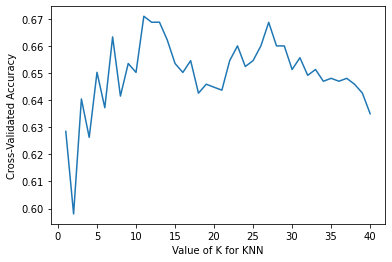

In [81]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x, y, cv=5)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Neural networks

In [83]:
import tensorflow.compat.v2 as tv
import tensorflow as tf
from tensorflow import keras 

In [88]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import regularizers
seed = 7
np.random.seed(seed)
model = Sequential()
model.add(Dense(30, input_dim=8, activation='relu'))
model.add(Dense(15,  activation='relu'))

model.add(Dense(1,  activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

In [89]:
history=model.fit(x, y, validation_split=0.33, epochs=150, batch_size=16,verbose=1) 

Epoch 1/150
39/39 [==============================] - 1s 8ms/step - loss: 1.3420 - acc: 0.6276 - val_loss: 0.6925 - val_acc: 0.5281
Epoch 2/150
39/39 [==============================] - 0s 3ms/step - loss: 0.5590 - acc: 0.7203 - val_loss: 0.6598 - val_acc: 0.5446
Epoch 3/150
39/39 [==============================] - 0s 3ms/step - loss: 0.5141 - acc: 0.7756 - val_loss: 0.5820 - val_acc: 0.7228
Epoch 4/150
39/39 [==============================] - 0s 3ms/step - loss: 0.4848 - acc: 0.8293 - val_loss: 0.5516 - val_acc: 0.7393
Epoch 5/150
39/39 [==============================] - 0s 3ms/step - loss: 0.4666 - acc: 0.8488 - val_loss: 0.5524 - val_acc: 0.7525
Epoch 6/150
39/39 [==============================] - 0s 3ms/step - loss: 0.4440 - acc: 0.8602 - val_loss: 0.5291 - val_acc: 0.7525
Epoch 7/150
39/39 [==============================] - 0s 3ms/step - loss: 0.4263 - acc: 0.8504 - val_loss: 0.5207 - val_acc: 0.7558
Epoch 8/150
39/39 [==============================] - 0s 3ms/step - loss: 0.4258 - a

In [90]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))  

23/23 [==============================] - 0s 2ms/step - loss: 0.3781 - acc: 0.8638
acc: 86.38%
6/6 [==============================] - 0s 2ms/step - loss: 0.3850 - acc: 0.8587
acc: 85.87%


In [94]:
model.history.history.keys()

dict_keys([])

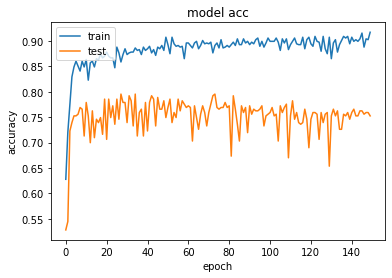

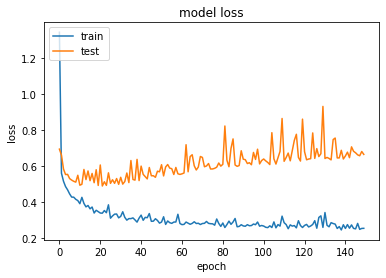

In [96]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Autokeras

In [97]:
import autokeras as ak

In [98]:
clf=ak.StructuredDataClassifier(overwrite=True,max_trials=3)
clf.fit(x_train,y_train,epochs=10)

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.8730158805847168

Best val_accuracy So Far: 0.8888888955116272
Total elapsed time: 00h 00m 15s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
23/23 [==============================] - 1s 3ms/step - loss: 0.6222 - accuracy: 0.7071
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.8283
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.4175 - accuracy: 0.8624
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8665
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8692
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8747
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8787
Epoch 8/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8815
Epoch 9/10
23/23 [==================

# tpot

In [99]:
from tpot import TPOTClassifier

In [101]:
tpot=TPOTClassifier(verbosity=2,max_time_mins=5)
tpot.fit(x_train,y_train)
print(tpot.score(x_test,y_test))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8746715124405927

5.11 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=2, max_features=0.55, min_samples_leaf=14, min_samples_split=15, n_estimators=100, subsample=0.7000000000000001)
0.8586956521739131


In [102]:
tpot.fitted_pipeline_

Pipeline(steps=[('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=2, max_features=0.55,
                                            min_samples_leaf=14,
                                            min_samples_split=15,
                                            subsample=0.7000000000000001))])

In [103]:
print(tpot.score(x_test,y_test))

0.8586956521739131


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=135,random_state=4)

In [105]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=135, random_state=4)

In [116]:
clf.predict([[0,0,0,0,1,0,0,1]]) 

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'